In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits as pf
import astropy.units as u
import os
import glob
# This makes nice big plots for matplotlib
import matplotlib as mpl
params = {'font.size': 14,
          'figure.figsize': (15.0, 8.0),
          'lines.linewidth': 2.,
          'lines.markersize': 15,
          'animation.embed_limit': 2048,
          }
mpl.rcParams.keys()
mpl.rcParams.update(params)
np.set_printoptions(suppress=True)

import sunpy.map

In [76]:
%%bash
ls

3481_11923_SHARP_CEA
3481_11923_SHARP_CEA_enhanced
3481_11923_SHARP_CEA_normalized
3481_11923_SHARP_CEA_normalized.tar.gz
3481_11923_SHARP_CEA_upscaled_magnetic_data.tar.gz
3604_11950_SHARP_CEA
hmi.sharp_cea_720s.3481.20131208_121200_TAI.continuum_ld_removed_normalized_enhanced.fits
hmi.sharp_cea_720s.3481.20131208_121200_TAI.continuum_ld_removed_normalized.fits
hmi.sharp_cea_720s.3481.20131208_121200_TAI.enhanced_normalized.fits
hmi.sharp_cea_720s.3481.20131213_173600_TAI.continuum_ld_removed_normalized_enhanced.fits
hmi.sharp_cea_720s.3481.20131213_173600_TAI.continuum_ld_removed_normalized.fits
hmi.sharp_cea_720s.3481.20131213_173600_TAI.enhanced_normalized.fits
Untitled.ipynb


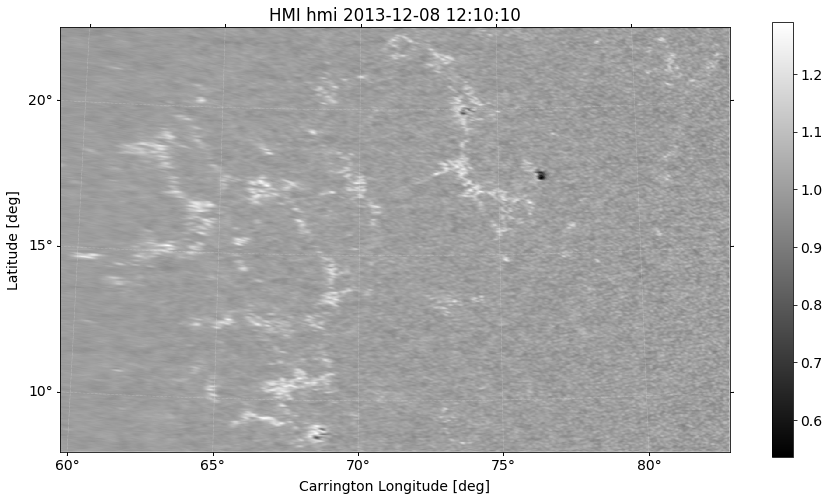

In [78]:
limb_norm_enh = sunpy.map.Map('hmi.sharp_cea_720s.3481.20131208_121200_TAI.enhanced_normalized.fits')
cent_norm_enh = sunpy.map.Map('hmi.sharp_cea_720s.3481.20131213_173600_TAI.enhanced_normalized.fits')
limb_norm_enh.peek()

In [6]:
# load enhanced data
limb_enh = sunpy.map.Map('hmi.sharp_cea_720s.3481.20131208_121200_TAI.continuum_ld_removed_normalized_enhanced.fits')
cent_enh = sunpy.map.Map('hmi.sharp_cea_720s.3481.20131213_173600_TAI.continuum_ld_removed_normalized_enhanced.fits')

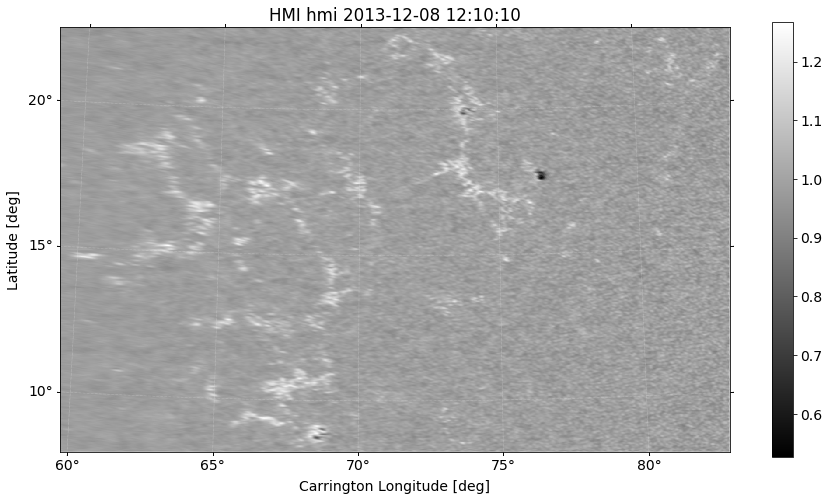

In [36]:
limb_enh.peek()


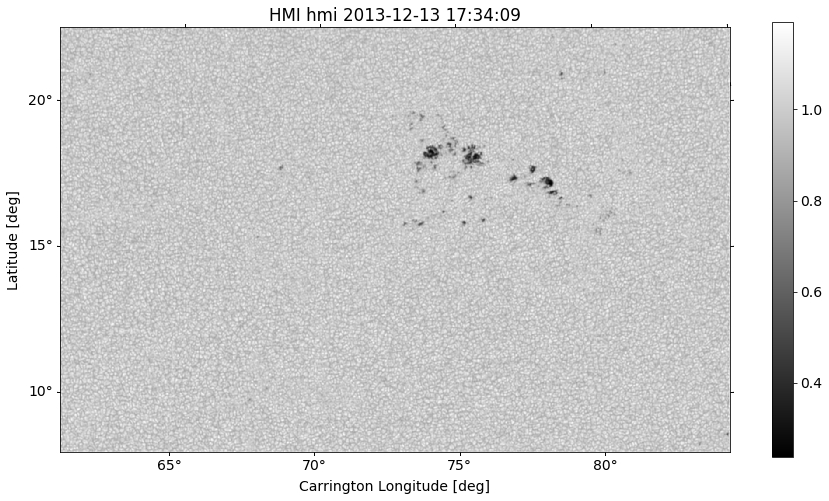

In [7]:
cent_eng.peek()

In [34]:
#load limb removed data
limb_norm = sunpy.map.Map('hmi.sharp_cea_720s.3481.20131208_121200_TAI.continuum_ld_removed_normalized.fits')
cent_norm = sunpy.map.Map('hmi.sharp_cea_720s.3481.20131213_173600_TAI.continuum_ld_removed_normalized.fits')

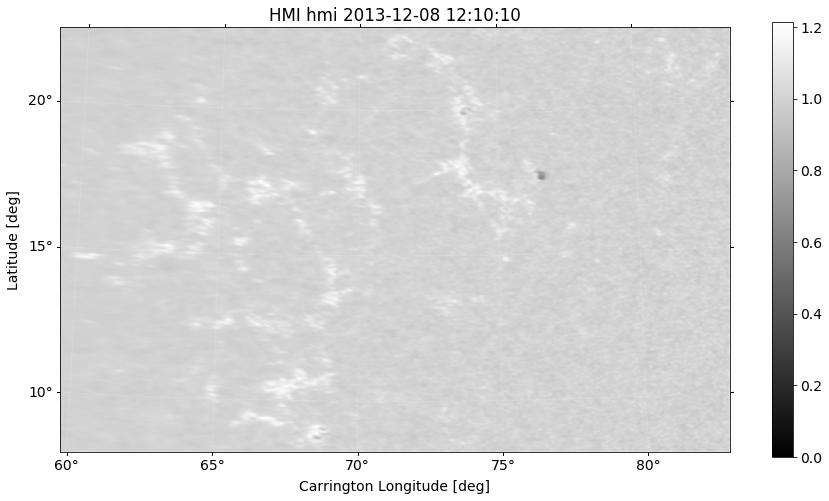

In [37]:

new_dimension = u.Quantity([limb_norm.meta["naxis1"]*2, limb_norm.meta["naxis2"]*2], u.pixel)
my_corrected_map = limb_norm.resample(new_dimension, method='spline')
my_corrected_map.peek()

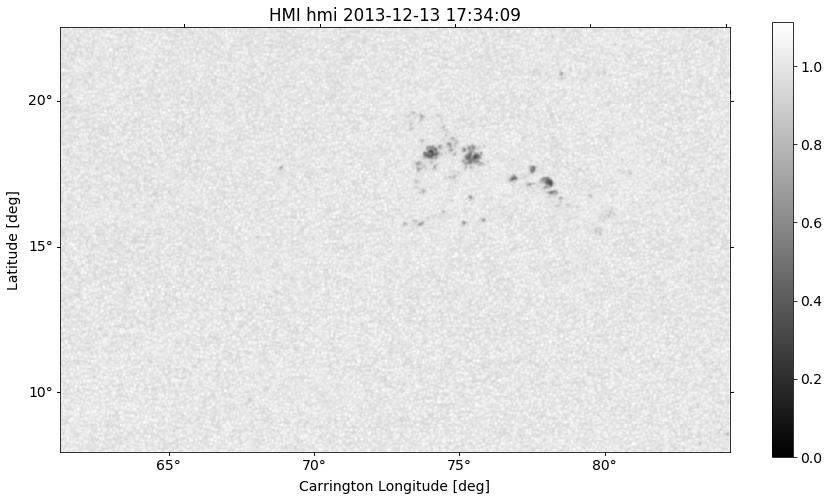

In [41]:
new_dimension_cent = u.Quantity([cent_norm.meta["naxis1"]*2, cent_norm.meta["naxis2"]*2], u.pixel)
my_corrected_map_cent = cent_norm.resample(new_dimension_cent, method='spline')
my_corrected_map_cent.peek()

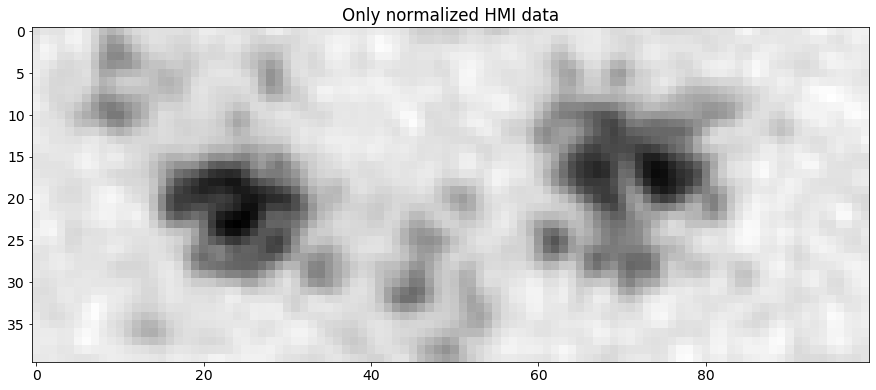

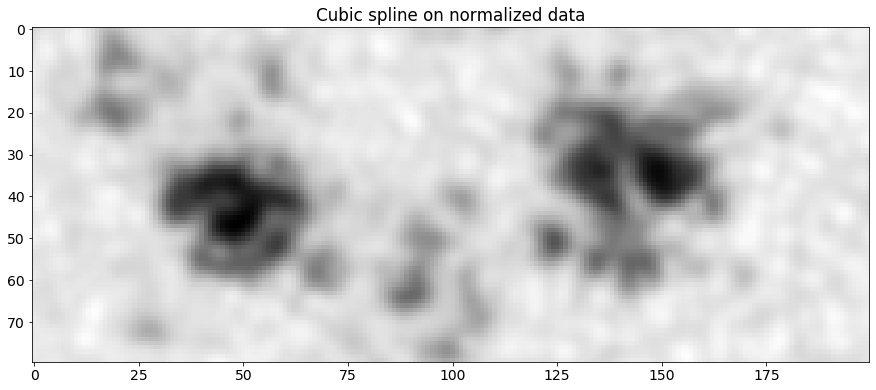

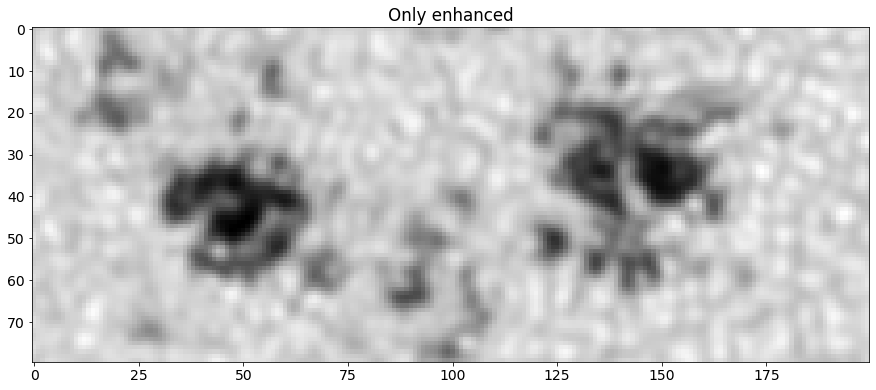

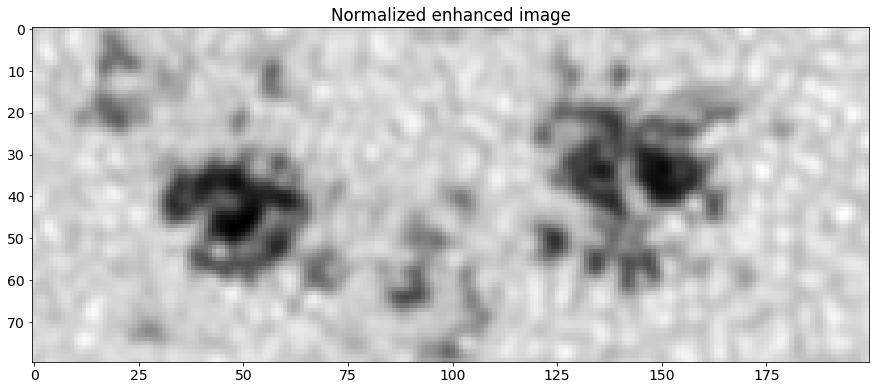

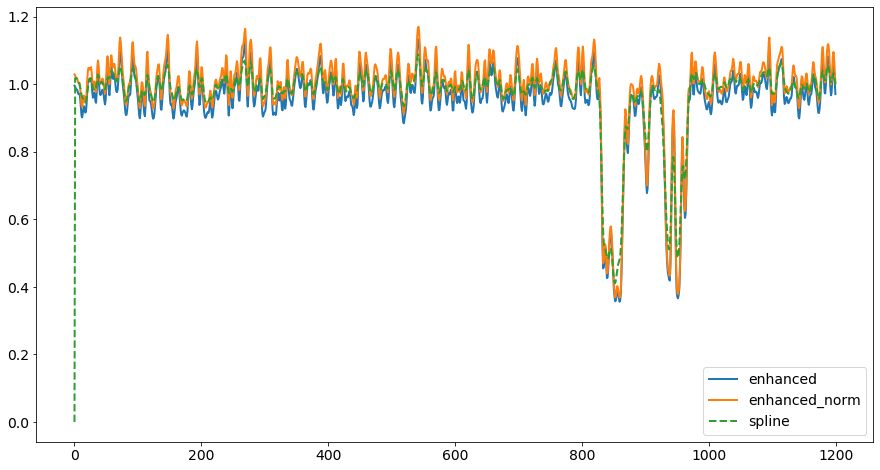

In [90]:
#my_corrected_map.peek()
#plt.imshow(cent_norm.data, cmap='gray')

plt.figure(0)
plt.imshow(cent_norm.data[320:360,400:500], cmap='gray')
plt.title('Only normalized HMI data')

plt.figure(1)
plt.imshow(my_corrected_map_cent.data[640:720,800:1000], cmap='gray')
plt.title('Cubic spline on normalized data')

plt.figure(2)
plt.imshow(cent_enh.data[640:720,800:1000], cmap='gray')
plt.title('Only enhanced')

plt.figure(3)
plt.imshow(cent_norm_enh.data[640:720,800:1000], cmap='gray')
plt.title('Normalized enhanced image')


#plt.avxhline(30)
#plt.figure(1)
#plt.imshow(my_corrected_map.data[600:650,1000:1200], cmap='gray')
plt.figure(4)
plt.plot(np.arange(0,1200,1), cent_enh.data[680,0:1200], label='enhanced')
plt.plot(np.arange(0,1200,1), cent_norm_enh.data[680,0:1200], label='enhanced_norm')
plt.plot(np.arange(0,1200,1), my_corrected_map_cent.data[680,0:1200], label='spline', linestyle='--')
plt.legend(loc='best')

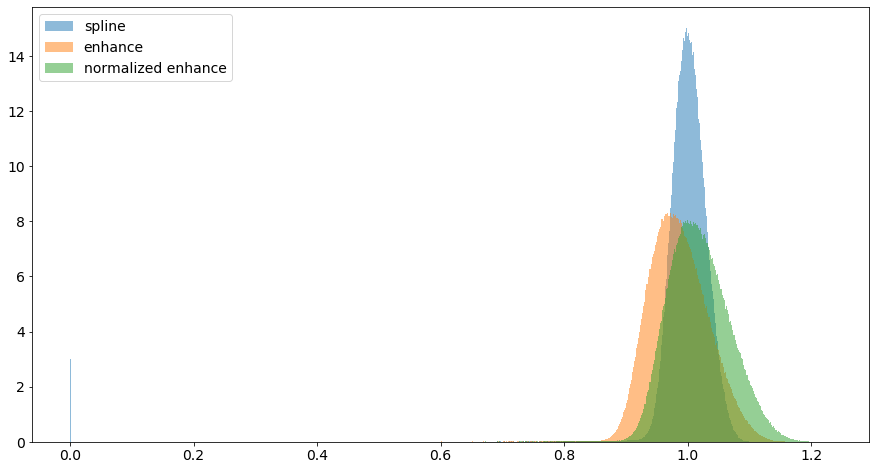

In [89]:
plt.hist(my_corrected_map_cent.data.flatten(), bins=1000, alpha=0.5,label='spline', density=True)
plt.hist(cent_enh.data.flatten(), bins=1000, alpha=0.5, density=True, label='enhance')
plt.hist(cent_norm_enh.data.flatten(), bins=1000, alpha=0.5, density=True, label='normalized enhance')
#plt.xlim([0.7,1.2])
plt.legend(loc='best')

(0.7, 1.2)

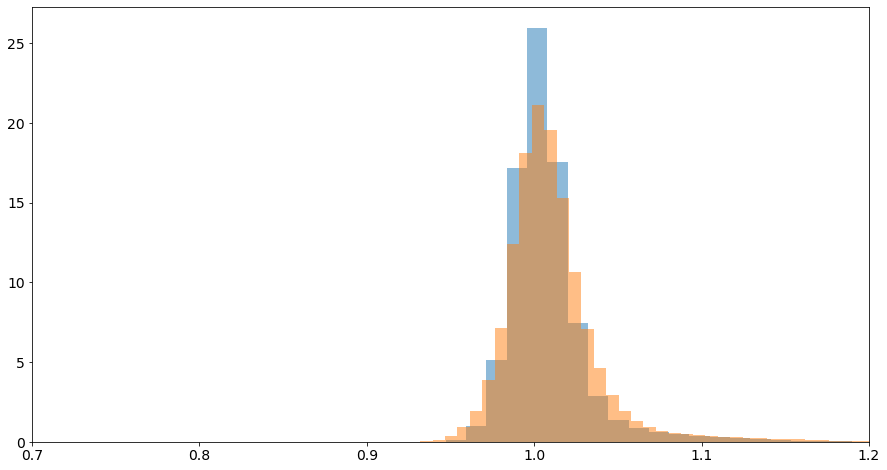

In [75]:
plt.hist(my_corrected_map.data.flatten(), bins=100, alpha=0.5,label='spline', density=True)
plt.hist(limb_enh.data.flatten()+0.02, bins=100, alpha=0.5, density=True)
plt.xlim([0.7,1.2])
#plt.legend(loc='best')